In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean1 = 55
std_dev1 = 10
num_samples = 500

column1_numbers = np.random.normal(mean1,std_dev1,num_samples)
column1_numbers = np.clip(column1_numbers,30,120)
column1_numbers = np.round(column1_numbers).astype(int)

mean2 = 18
std_dev2 = 3

column2_numbers = np.random.normal(mean2,std_dev2,num_samples)
column2_numbers = np.clip(column2_numbers,12,26)
column2_numbers = np.round(column2_numbers).astype(int)

column3_numbers = np.random.randint(2,size=num_samples)
column3_numbers[column1_numbers > mean1] = 1

data = {'Miles_Per_week': column1_numbers,
        'Farthest_run': column2_numbers,
        'Qualified_Boston_Marathon': column3_numbers}
df = pd.DataFrame(data)

In [3]:
df

Miles_Per_week  Farthest_run  Qualified_Boston_Marathon
0                60            25                          1
1                61            12                          1
2                64            17                          1
3                54            21                          0
4                62            17                          1
..              ...           ...                        ...
495              55            15                          1
496              46            26                          1
497              38            21                          0
498              56            21                          1
499              55            18                          0

[500 rows x 3 columns]

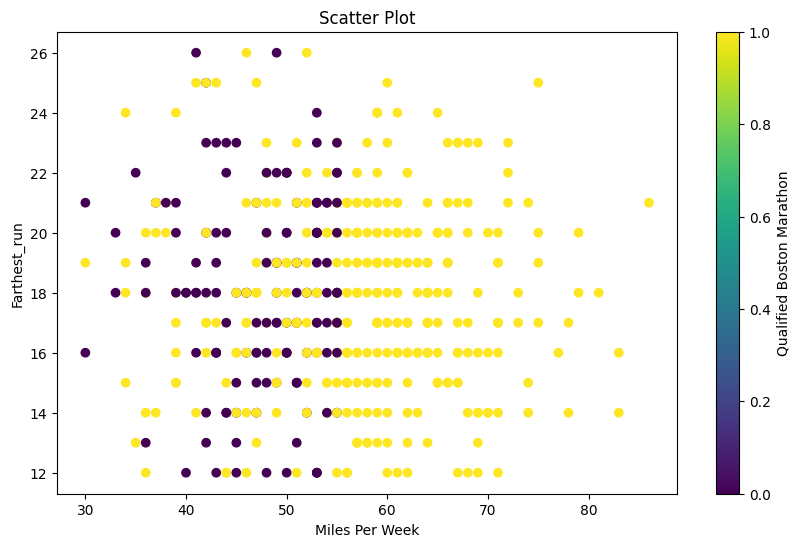

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df['Miles_Per_week'],df['Farthest_run'],c=df['Qualified_Boston_Marathon'])
plt.xlabel('Miles Per Week')
plt.ylabel('Farthest_run')
plt.title('Scatter Plot')
plt.colorbar(label='Qualified Boston Marathon')
plt.show()

In [5]:
x = df.iloc[:,0:2]

In [6]:
x

Miles_Per_week  Farthest_run
0                60            25
1                61            12
2                64            17
3                54            21
4                62            17
..              ...           ...
495              55            15
496              46            26
497              38            21
498              56            21
499              55            18

[500 rows x 2 columns]

In [7]:
y = df.iloc[:,2]

In [8]:
y

0      1
1      1
2      1
3      0
4      1
      ..
495    1
496    1
497    0
498    1
499    0
Name: Qualified_Boston_Marathon, Length: 500, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=33,test_size=0.2)

In [11]:
from sklearn.svm import SVC

In [12]:
model = SVC()

In [13]:
model.fit(x_train,y_train)

SVC()

In [14]:
model.score(x_test,y_test)

0.75

In [15]:
#regularization

In [16]:
model_reg0 = SVC(C=0.1)

In [17]:
model_reg0.fit(x_train,y_train)

SVC(C=0.1)

In [18]:
model_reg0.score(x_test,y_test)

0.79

In [19]:
model_reg1 = SVC(C=0.1)
model_reg1.fit(x_train,y_train)
model_reg1.score(x_test,y_test)

0.79

In [20]:
model_reg2 = SVC(C=1000)
model_reg2.fit(x_train,y_train)
model_reg2.score(x_test,y_test)

0.7

In [21]:
#Gamma

In [22]:
model_gamma0 = SVC(gamma=0.1)
model_gamma0.fit(x_train,y_train)
model_gamma0.score(x_test,y_test)

0.75

In [23]:
model_gamma1 = SVC(gamma=1)
model_gamma1.fit(x_train,y_train)
model_gamma1.score(x_test,y_test)

0.76

In [24]:
model_gamma2 = SVC(gamma=1000)
model_gamma2.fit(x_train,y_train)
model_gamma2.score(x_test,y_test)

0.72

In [25]:
#kernel

In [26]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train,y_train)
model_linear.score(x_test,y_test)

0.77

In [27]:
model_linear = SVC(kernel='rbf')
model_linear.fit(x_train,y_train)
model_linear.score(x_test,y_test)

0.75